# Introduction

In this exploratory data analysis (EDA), our goal is to understand the **Rainfall Prediction** dataset in depth. We are tasked with predicting whether it will rain (binary target: 0 or 1) based on various meteorological features. This notebook will guide us through:

- **Data loading and inspection** (shapes, columns, missing values).
- **Statistical summaries** (mean, std, quartiles).
- **Univariate and bivariate analyses** (distributions, boxplots, correlations).
- **Comparisons between train and test sets**.
- **Key takeaways** regarding the relationships between features and how they relate to rainfall.

By the end of this notebook, we will have a clearer understanding of:
- Which features might be the strongest indicators for rainfall.
- The presence of any data quality issues (missing values, outliers).
- Potential next steps for modeling (e.g., feature engineering, handling missing data, dealing with class imbalanceetc.).

---



### Key finding from this EDA

1. **Class Imbalance**: Approximately 75% of days are rainy. We should consider balancing techniques or appropriate metrics (e.g., ROC AUC, F1-score) to handle this imbalance.
2. **Correlated Features**: 
   - **maxtemp**, **temparature**, and **mintemp** are highly correlated. We might drop or combine some to reduce multicollinearity.
   - **cloud** and **sunshine** show a strong negative correlation.
3. **Key Drivers of Rainfall**: High humidity, cloud cover, dewpoint, and lower sunshine correlate with rainfall.
4. **Missing Value**: Test set has 1 missing value in `winddirection` that needs to be handled (imputation or dropping).
5. **Seasonality**: Temperature features exhibit seasonal trends over `day`.

---

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Configure visualizations
plt.style.use('seaborn-whitegrid')
%matplotlib inline

<ipython-input-1-c26560421b02>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
# Load datasets from CSV files
train = pd.read_csv('/kaggle/input/playground-series-s5e3/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e3/test.csv')
submission = pd.read_csv('/kaggle/input/playground-series-s5e3/sample_submission.csv')

# Display basic information about file shapes
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Submission shape:", submission.shape)

Train shape: (2190, 13)
Test shape: (730, 12)
Submission shape: (730, 2)


In [3]:
# Display the first few rows of the training set
train.head()

id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0   0    1    1017.4     21.2         20.6     19.9      19.4      87.0   
1   1    2    1019.5     16.2         16.9     15.8      15.4      95.0   
2   2    3    1024.1     19.4         16.1     14.6       9.3      75.0   
3   3    4    1013.4     18.1         17.8     16.9      16.8      95.0   
4   4    5    1021.8     21.3         18.4     15.2       9.6      52.0   

   cloud  sunshine  winddirection  windspeed  rainfall  
0   88.0       1.1           60.0       17.2         1  
1   91.0       0.0           50.0       21.9         1  
2   47.0       8.3           70.0       18.1         1  
3   95.0       0.0           60.0       35.6         1  
4   45.0       3.6           40.0       24.8         0

### Explanation and Findings

- **Purpose**: We read the training, test, and sample submission files into `pandas` DataFrames.
- **Shapes**:
  - Train data has **2190 rows and 13 columns**.
  - Test data has **730 rows and 12 columns**.
  - Submission file has **730 rows and 2 columns**.
- **Key Observation**: The train set has one extra column for the target (`rainfall`), which the test set does not. The first few rows show the structure of the dataset and confirm the presence of features like `day`, `pressure`, `maxtemp`, `temparature`, et.

---


In [4]:
# Check data types, non-null counts and identify any missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB


In [5]:
print("\nMissing values in train dataset:")
print(train.isnull().sum())


Missing values in train dataset:
id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             730 non-null    int64  
 1   day            730 non-null    int64  
 2   pressure       730 non-null    float64
 3   maxtemp        730 non-null    float64
 4   temparature    730 non-null    float64
 5   mintemp        730 non-null    float64
 6   dewpoint       730 non-null    float64
 7   humidity       730 non-null    float64
 8   cloud          730 non-null    float64
 9   sunshine       730 non-null    float64
 10  winddirection  729 non-null    float64
 11  windspeed      730 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 68.6 KB


In [7]:
print("\nMissing values in test dataset:")
print(test.isnull().sum())


Missing values in test dataset:
id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64


### Explanation and Findings

- **Data Types**: 
  - The training set has 10 float columns and 3 integer columns.
  - The test set has 10 float columns and 2 integer columns.
- **Missing Values**:
  - Train: No missing values in any column.
  - Test: Only 1 missing value in the `winddirection` column.
- **Key Point**: We must handle or impute that single missing value in `winddirection` before modelig.

---


In [8]:
# Generate descriptive statistics for numerical columns in the training data
train.describe().T

count         mean         std    min       25%      50%  \
id             2190.0  1094.500000  632.342866    0.0   547.250  1094.50   
day            2190.0   179.948402  105.203592    1.0    89.000   178.50   
pressure       2190.0  1013.602146    5.655366  999.0  1008.600  1013.00   
maxtemp        2190.0    26.365799    5.654330   10.4    21.300    27.80   
temparature    2190.0    23.953059    5.222410    7.4    19.300    25.50   
mintemp        2190.0    22.170091    5.059120    4.0    17.700    23.85   
dewpoint       2190.0    20.454566    5.288406   -0.3    16.800    22.15   
humidity       2190.0    82.036530    7.800654   39.0    77.000    82.00   
cloud          2190.0    75.721918   18.026498    2.0    69.000    83.00   
sunshine       2190.0     3.744429    3.626327    0.0     0.400     2.40   
winddirection  2190.0   104.863151   80.002416   10.0    40.000    70.00   
windspeed      2190.0    21.804703    9.898659    4.4    14.125    20.50   
rainfall       2190.0     0.753425    0.431116    0.0     1.000     1.00   

                    75%     max  
id             1641.750  2189.0  
day             270.000   365.0  
pressure       1017.775  1034.6  
maxtemp          31.200    36.0  
temparature      28.400    31.5  
mintemp          26.400    29.8  
dewpoint         25.000    26.7  
humidity         88.000    98.0  
cloud            88.000   100.0  
sunshine          6.800    12.1  
winddirection   200.000   300.0  
windspeed        27.900    59.5  
rainfall          1.000     1.0

### Explanation and Findings

- **Descriptive Stats** show:
  - `maxtemp`, `temparature`, `mintemp` have similar ranges, suggesting strong correlation among them.
  - `humidity` ranges from 39 to 98, with a mean around 82.
  - `cloud` ranges from 2 to 100, indicating a wide spread in cloud cover.
  - `sunshine` can be as high as ~12 hours but also can be 0 on many days.
  - `rainfall` is binary, but from the mean (0.75), we see **~75%** of the data points are rainy days.
- **Key Observation**: There is a **class imbalance** in the target variabe.

---


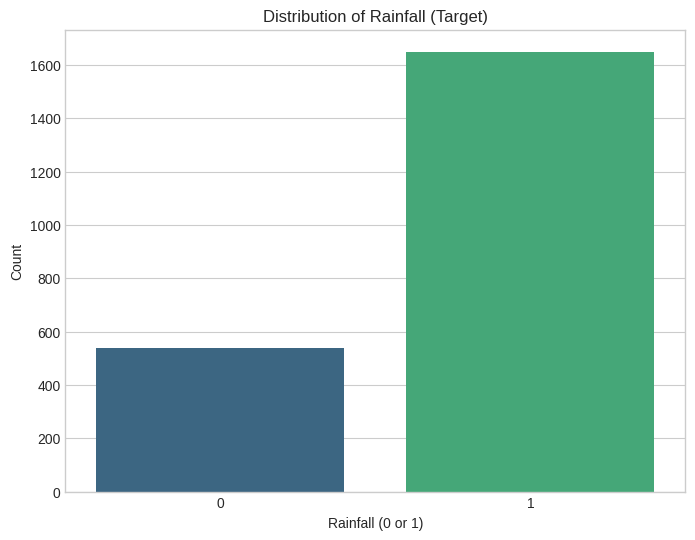

In [9]:
# Visualize the distribution of the binary target variable "rainfall"
plt.figure(figsize=(8, 6))
sns.countplot(x='rainfall', data=train, palette='viridis')
plt.title('Distribution of Rainfall (Target)')
plt.xlabel('Rainfall (0 or 1)')
plt.ylabel('Count')
plt.show()

### Explanation and Findings

- **Countplot** shows that:
  - The "1" category (rain) is significantly more frequent than the "0" category (no rain).
  - This confirms the imbalance: about 75% of observations are rainy days.
- **Key Point**: We may need to address this imbalance during model training (e.g., using class weights or oversampling/undersampling).

---


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

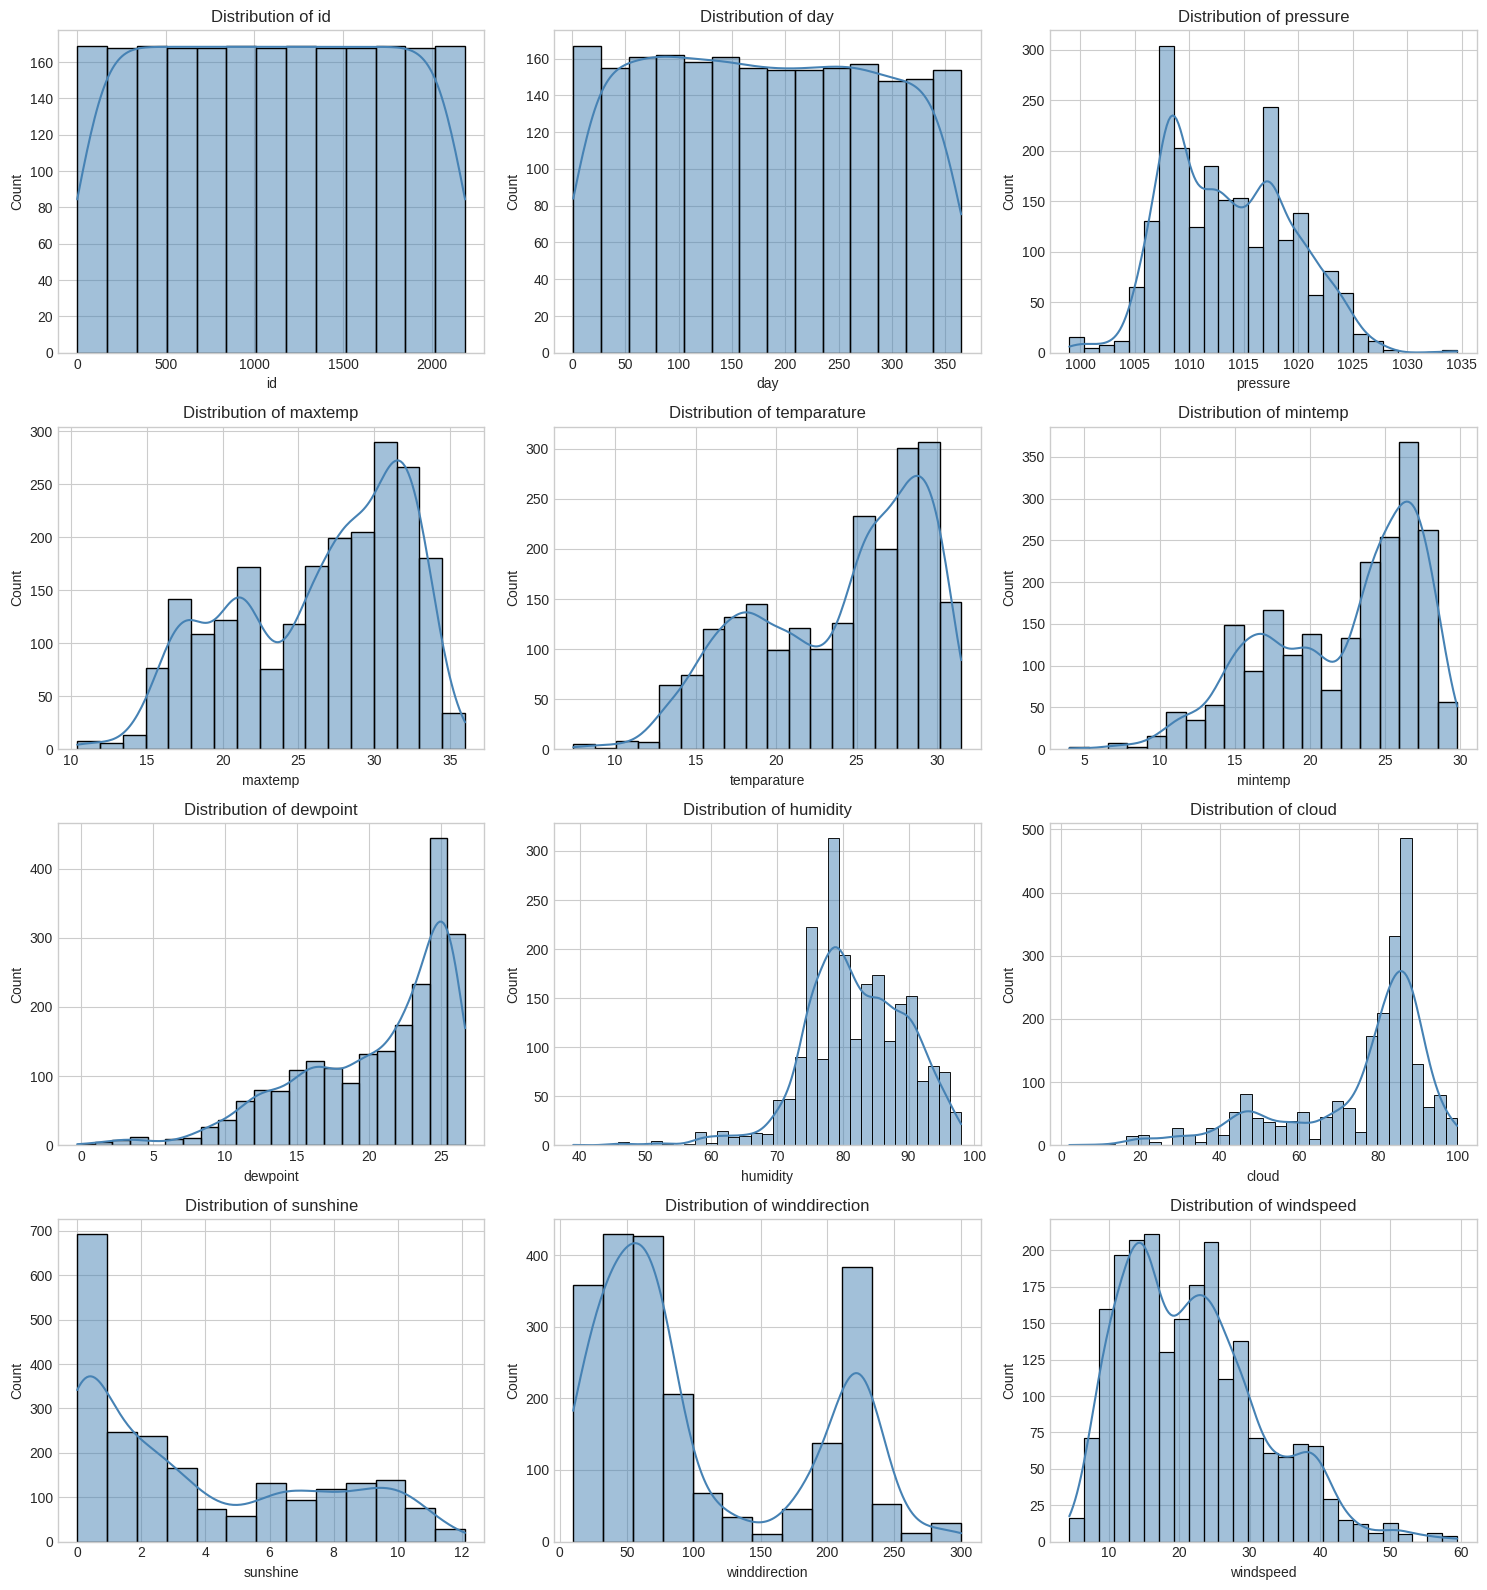

In [10]:
# Plot histograms (with KDE) for all numeric features except the target
numeric_features = train.select_dtypes(include=[np.number]).columns.tolist()
if 'rainfall' in numeric_features:
    numeric_features.remove('rainfall')  # Exclude target variable

# Create subplots for each numeric feature
num_cols = 3
num_rows = (len(numeric_features) // num_cols) + int(len(numeric_features) % num_cols != 0)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5*num_cols, 4*num_rows))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.histplot(train[feature], kde=True, ax=axes[i], color='steelblue')
    axes[i].set_title(f'Distribution of {feature}')
    
# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

### Explanation and Findings

- **Histograms + KDE** give a quick sense of each feature’s distribution.
- **Notable Observations**:
  - `day` is uniformly distributed from 1 to 365 (since it likely represents day of year).
  - `pressure` is slightly skewed around ~1013 hPa.
  - `maxtemp`, `temparature`, and `mintemp` appear roughly normal with some skew.
  - `sunshine` has many days near 0 hours and a smaller peak around 8–12 hours.
  - `winddirection` and `windspeed` vary widely, though `winddirection` is somewhat bimodal.
- **Potential Next Steps**: Evaluate transformations if skew is severe, but many features look reasonably distribued.

---


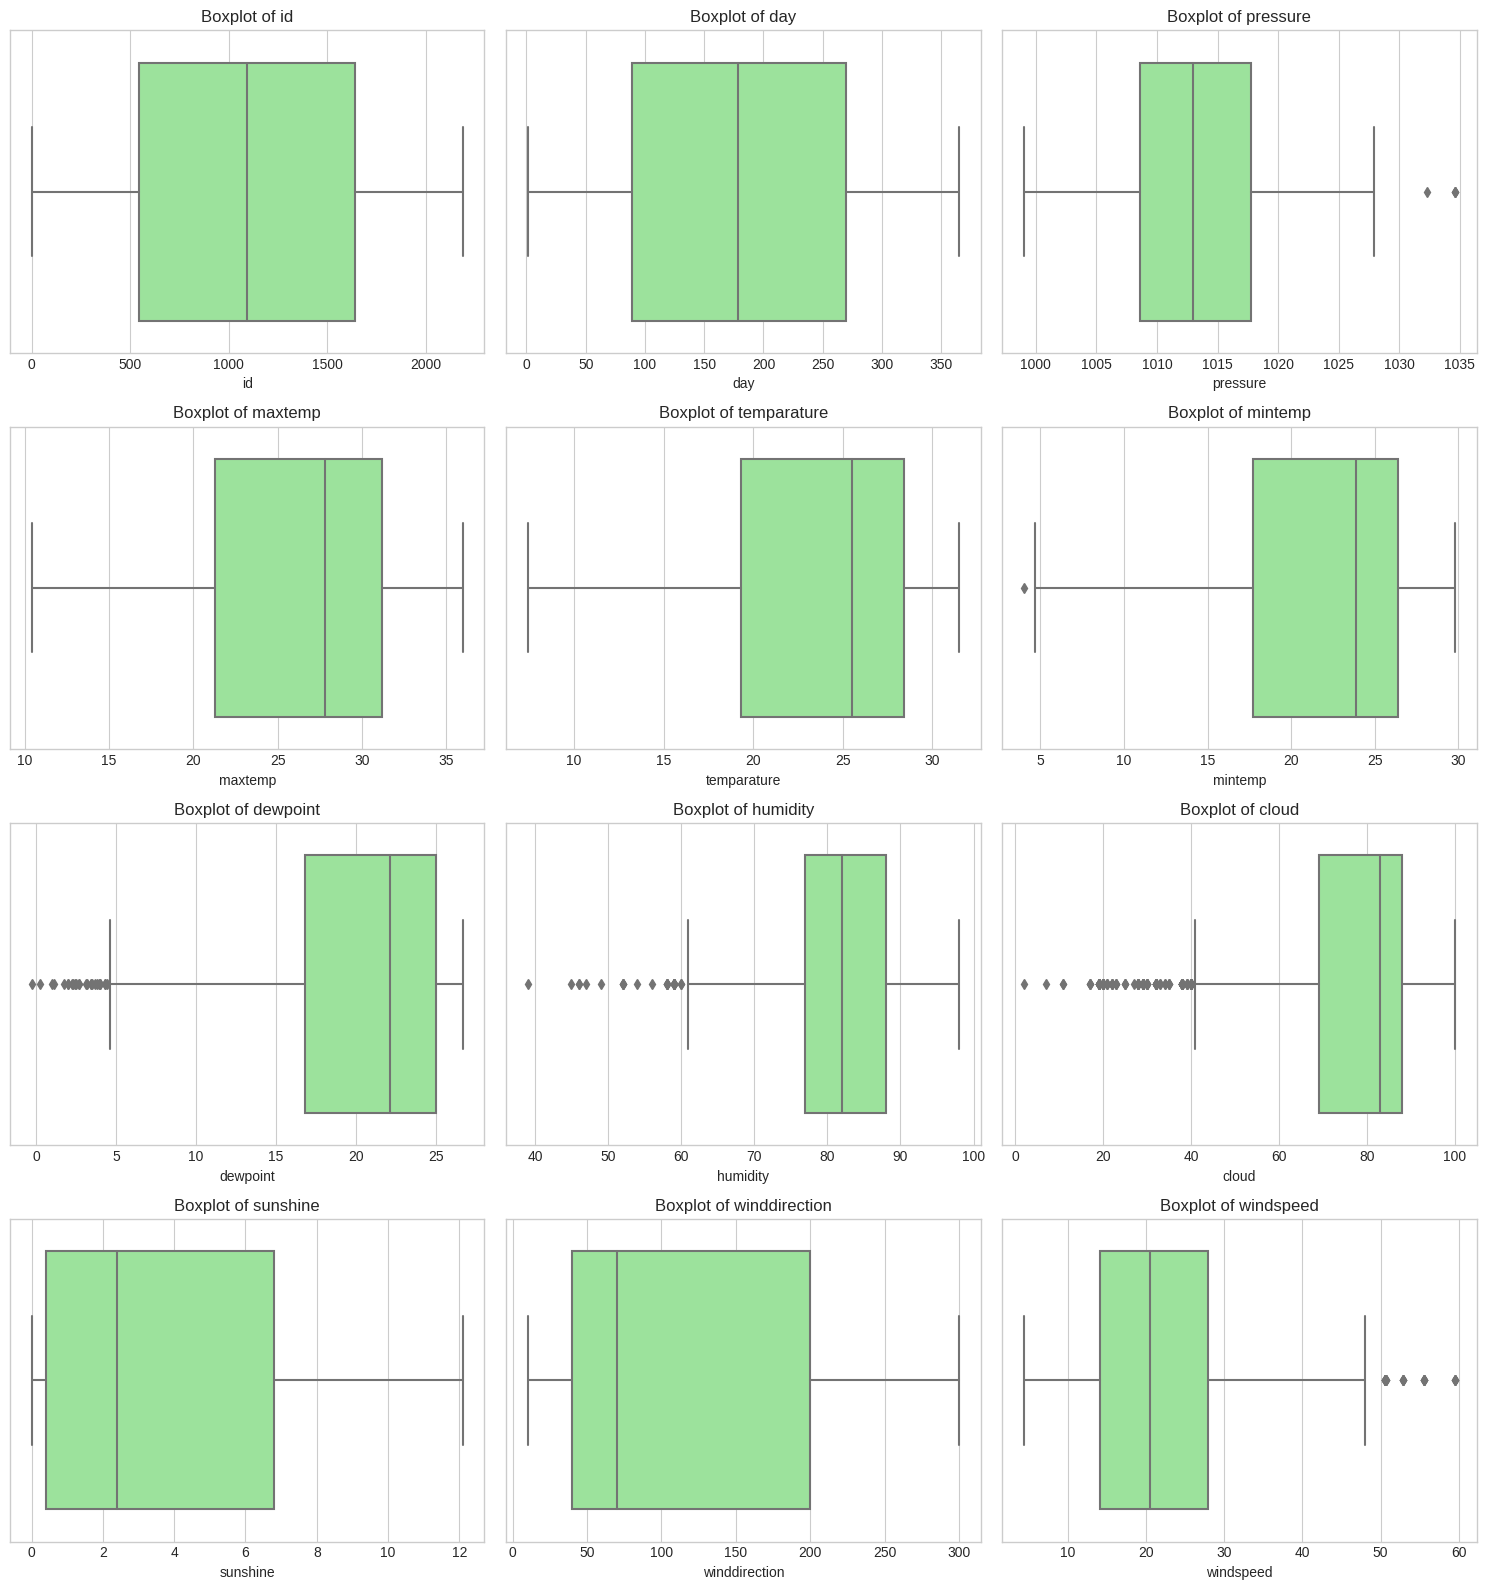

In [11]:
# Create boxplots for each numeric feature to check for outliers
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5*num_cols, 4*num_rows))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.boxplot(x=train[feature], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot of {feature}')
    
# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

### Explanation and Findings

- **Boxplots** help identify potential outliers.
- **Observations**:
  - `pressure`, `cloud`, `humidity`, `sunshine` have a few points on the edges, but not extremely far out.
  - `windspeed` shows some higher values that might be outliers (e.g., near 60).
  - `winddirection` also shows a few points near 300, though it may be valid if it represents degrees.
- **Key Takeaway**: Outliers may or may not be genuine. Further domain knowledge would help decide whether to cap or transform the.

---


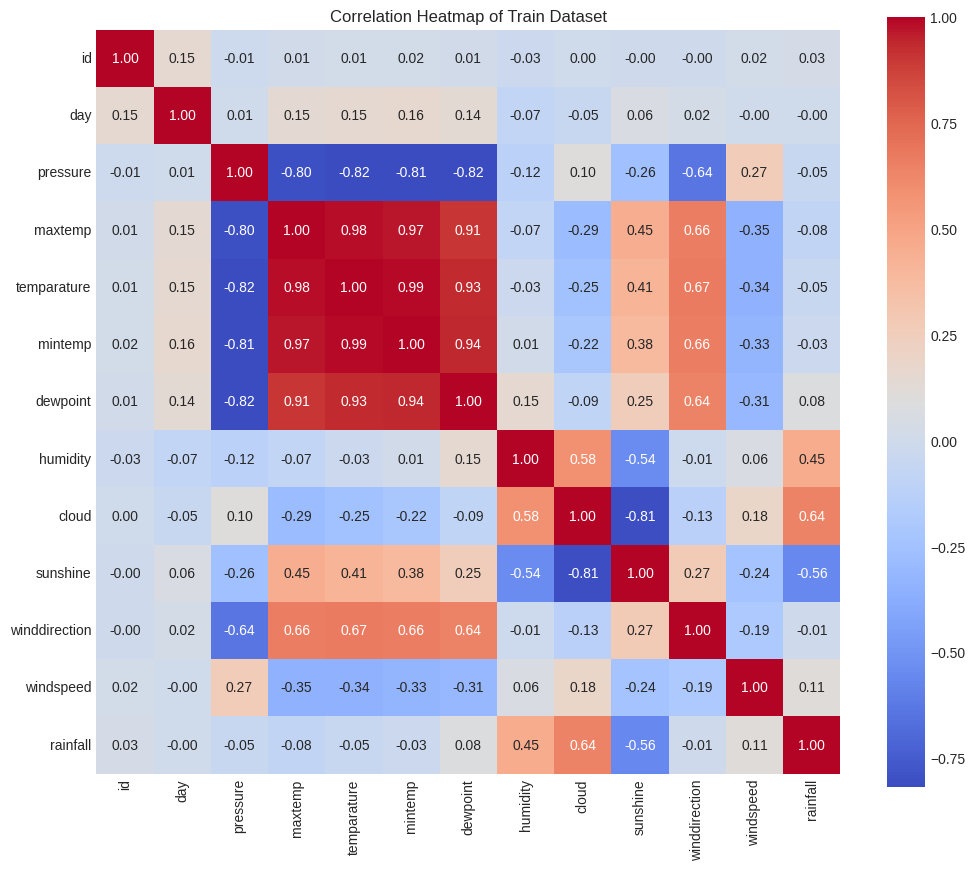

In [12]:
# Compute and visualize the correlation matrix for numeric features in the train set
plt.figure(figsize=(12, 10))
corr = train.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Train Dataset')
plt.show()

### Explanation and Findings

- **Heatmap**:
  - `maxtemp`, `temparature`, and `mintemp` are highly correlated with each other (> 0.90).
  - `sunshine` is negatively correlated with `cloud` (around -0.81), which makes sense physically.
  - `humidity` is positively correlated with `dewpoint`.
  - `rainfall` is somewhat correlated with `dewpoint`, `humidity`, and `cloud`, suggesting these features are important for predicting rain.
- **Key Point**: We might consider dropping one of the highly correlated temperature features to reduce redundancy.

---

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

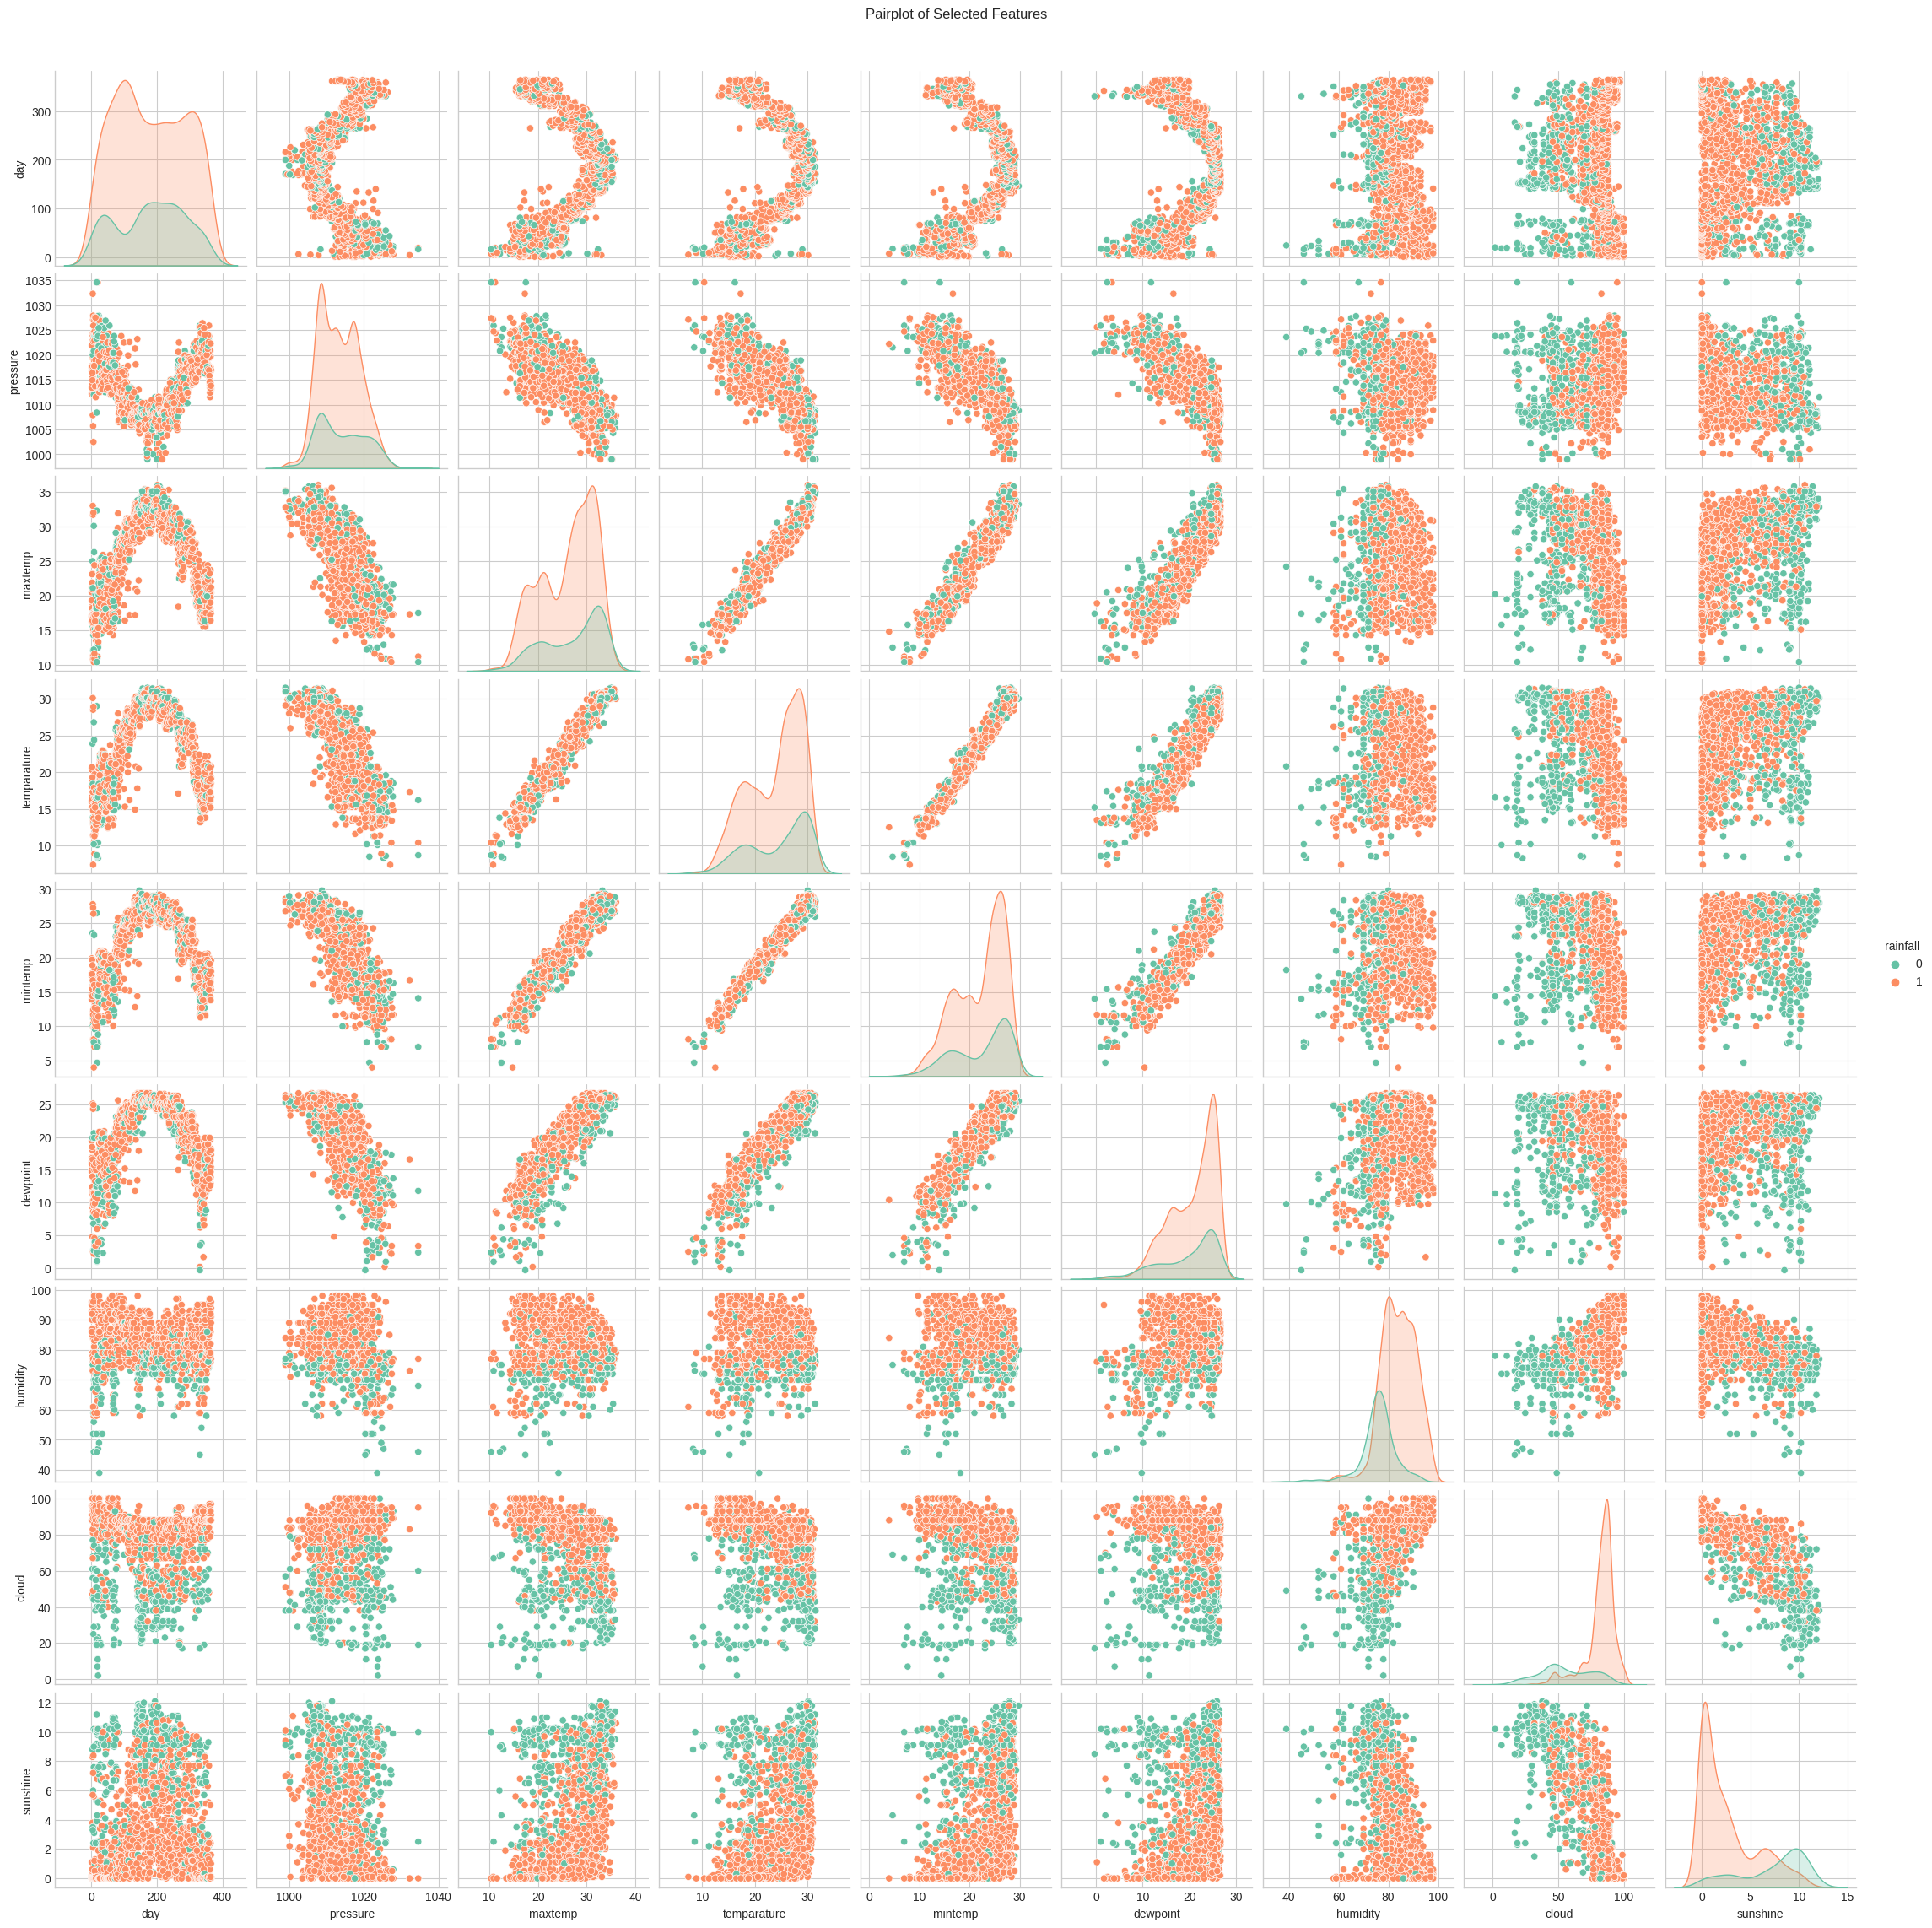

In [13]:
# Create a pairplot for a selection of features including the target
selected_features = ['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine']
# Ensure that the selected features are in the dataset
selected_features = [feat for feat in selected_features if feat in train.columns]

sns.pairplot(train[selected_features + ['rainfall']], hue='rainfall', diag_kind='kde', palette='Set2')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

### Explanation and Findings

- **Pairplot**:
  - Visualizes pairwise relationships and how they differ for `rainfall = 0` vs. `rainfall = 1`.
  - We see clusters forming for certain features, such as `maxtemp` vs. `dewpoint`.
  - When `rainfall = 1`, the data tends to shift toward higher humidity, cloud, and dewpoint values.
- **Key Takeaway**: This confirms the correlation analysis and highlights how certain features shift distribution based on the rainfall label

---


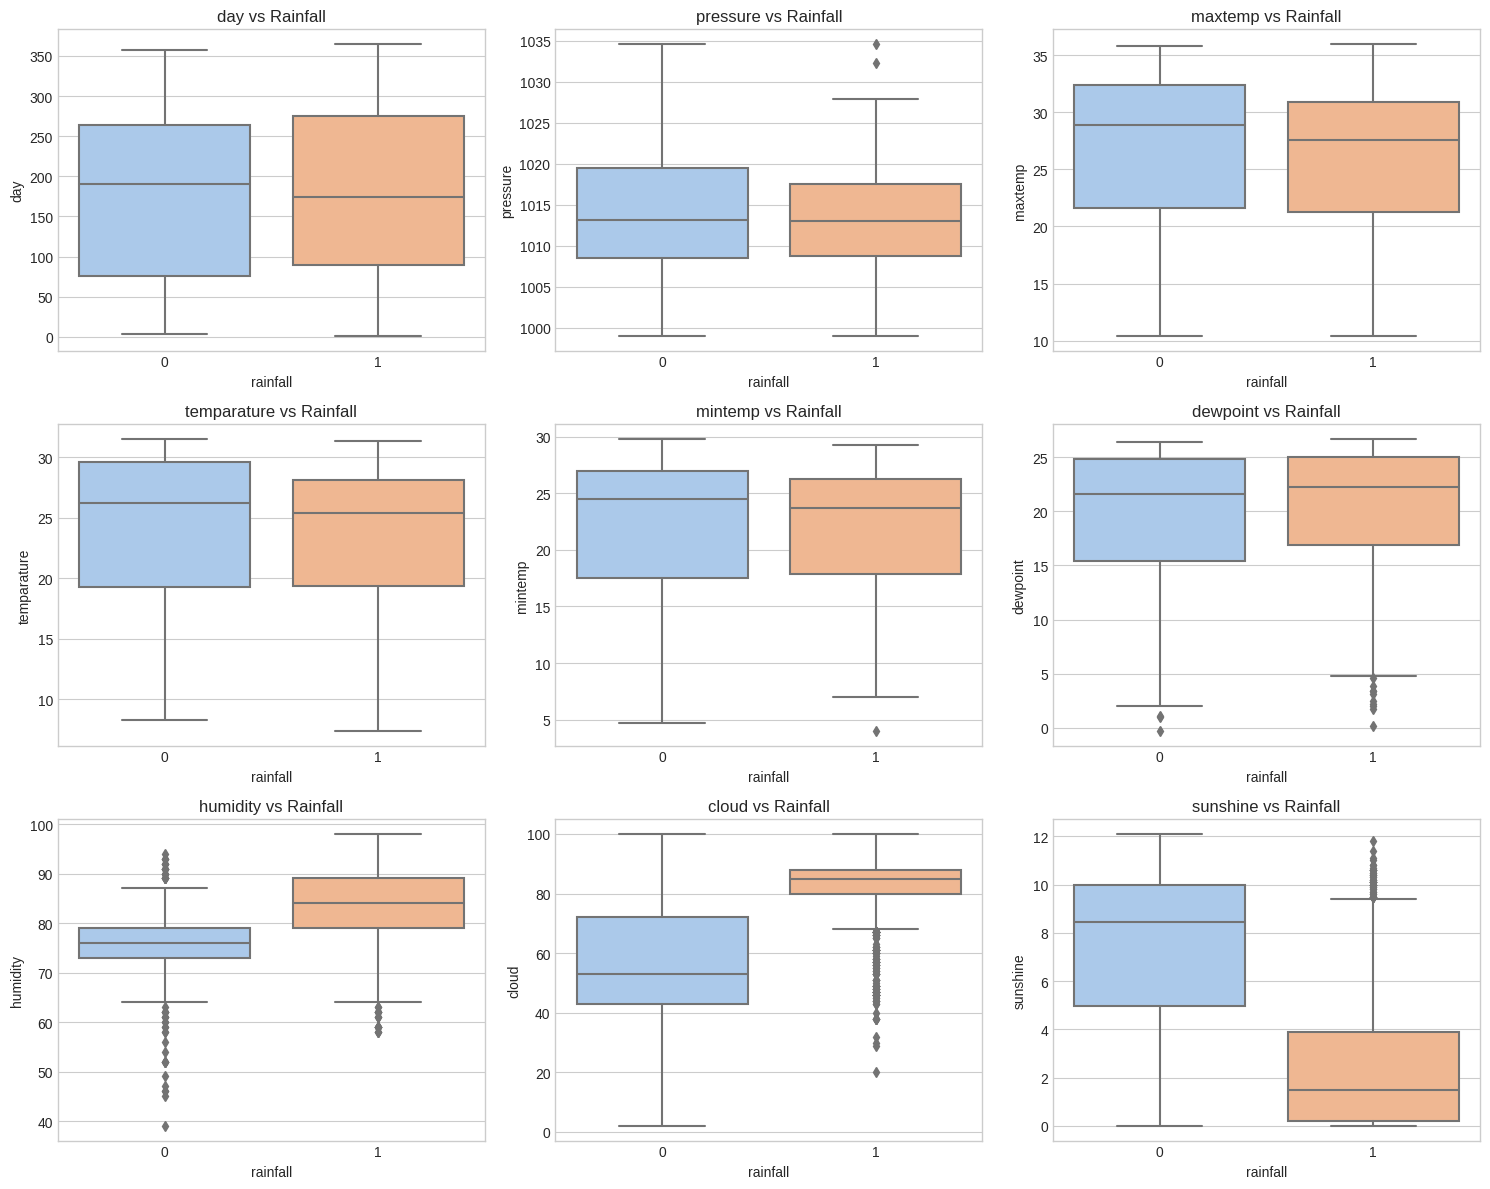

In [14]:
# Visualize relationships between features and the target variable
# Here we use boxplots to see how the distribution of each feature changes with rainfall

features_to_compare = selected_features  # or choose a subset
num_cols = 3
num_rows = (len(features_to_compare) // num_cols) + int(len(features_to_compare) % num_cols != 0)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5*num_cols, 4*num_rows))
axes = axes.flatten()

for i, feature in enumerate(features_to_compare):
    sns.boxplot(x='rainfall', y=feature, data=train, ax=axes[i], palette='pastel')
    axes[i].set_title(f'{feature} vs Rainfall')
    
# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

### Explanation and Findings

- **Boxplots** grouped by `rainfall`:
  - When `rainfall = 1`, **dewpoint**, **humidity**, and **cloud** values tend to be higher than when `rainfall = 0`.
  - **Sunshine** tends to be lower when `rainfall = 1`.
  - **Pressure** is slightly lower on rainy days (but not by a large margin).
- **Key Point**: This aligns with meteorological intuition: higher humidity, cloud cover, and lower sunshine correspond to rainy conditions

---


<ipython-input-15-684f35d28f32>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[feature], label='Train', shade=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<ipython-input-15-684f35d28f32>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test[feature], label='Test', shade=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use

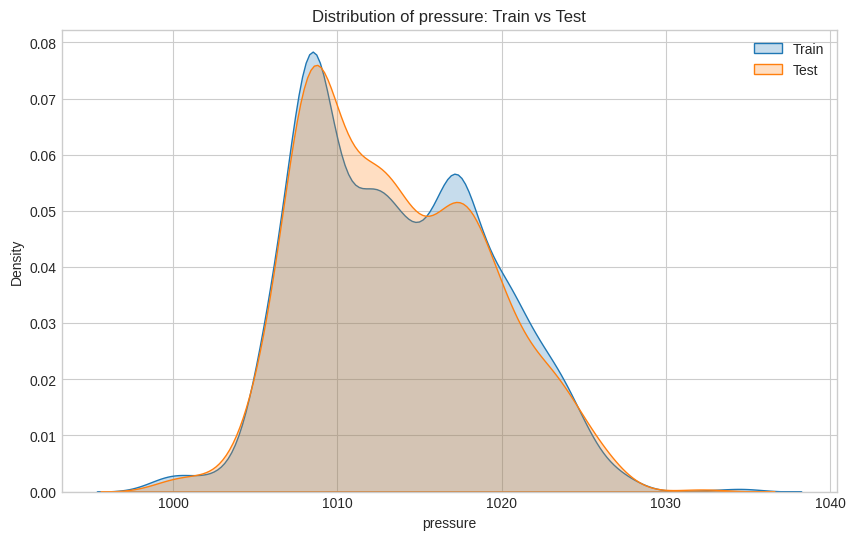

<ipython-input-15-684f35d28f32>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[feature], label='Train', shade=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<ipython-input-15-684f35d28f32>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test[feature], label='Test', shade=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use

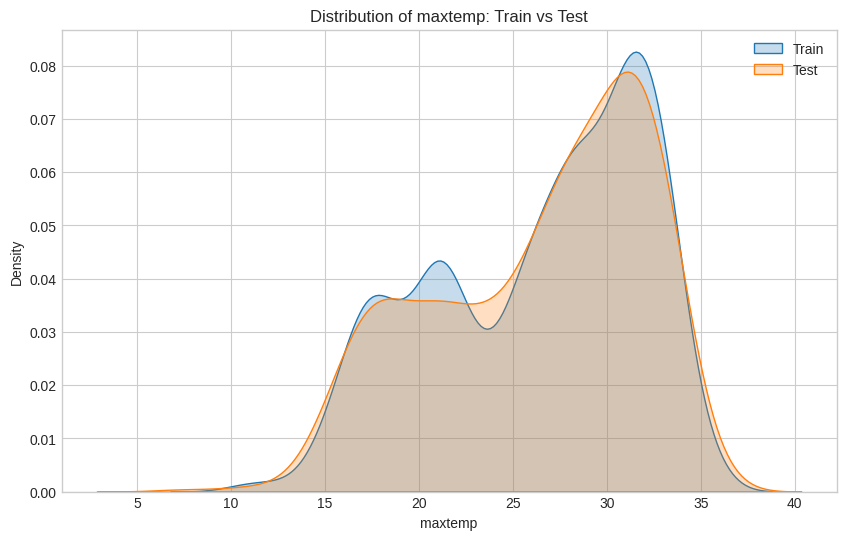

<ipython-input-15-684f35d28f32>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[feature], label='Train', shade=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<ipython-input-15-684f35d28f32>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test[feature], label='Test', shade=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use

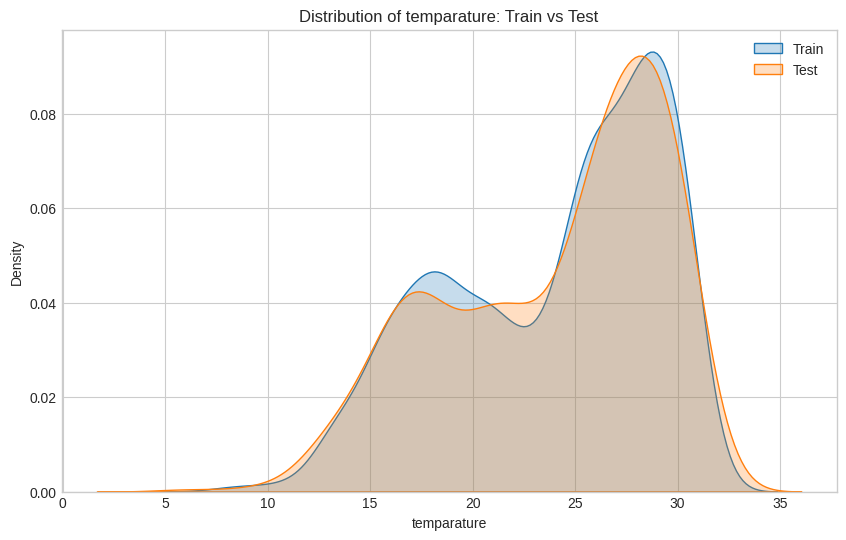

In [15]:
# Compare the distribution of some features between the train and test datasets
features_to_compare = ['pressure', 'maxtemp', 'temparature']  # adjust features as needed

for feature in features_to_compare:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(train[feature], label='Train', shade=True)
    sns.kdeplot(test[feature], label='Test', shade=True)
    plt.title(f'Distribution of {feature}: Train vs Test')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

### Explanation and Findings

- **Train vs. Test Distributions**:
  - `pressure`, `maxtemp`, and `temparature` show **very similar** distributions across train and test.
  - This indicates that the test data likely comes from a similar population as the train data.
- **Key Observation**: No major shift or drift is evident, suggesting model training should generalize well (assuming no time-based drift).

---


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


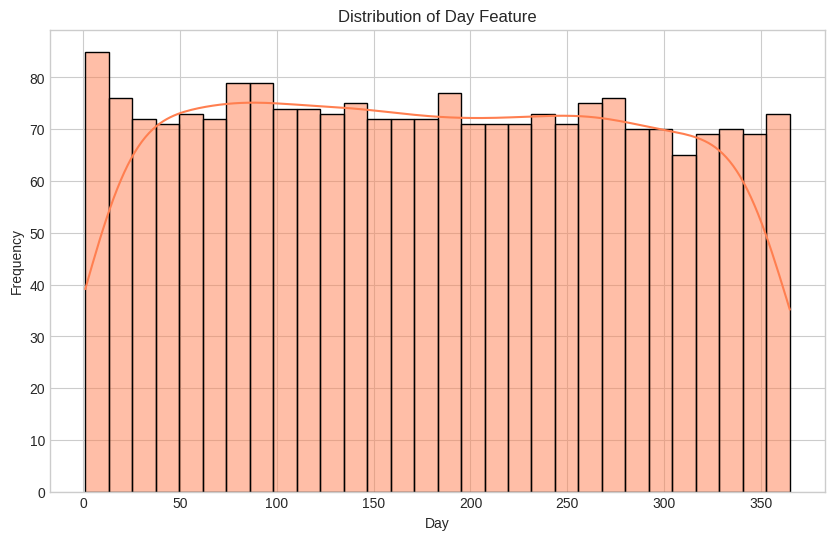

In [16]:
# Checking date (day) distribution and trends
plt.figure(figsize=(10, 6))
sns.histplot(train['day'], bins=30, kde=True, color='coral')
plt.title('Distribution of Day Feature')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

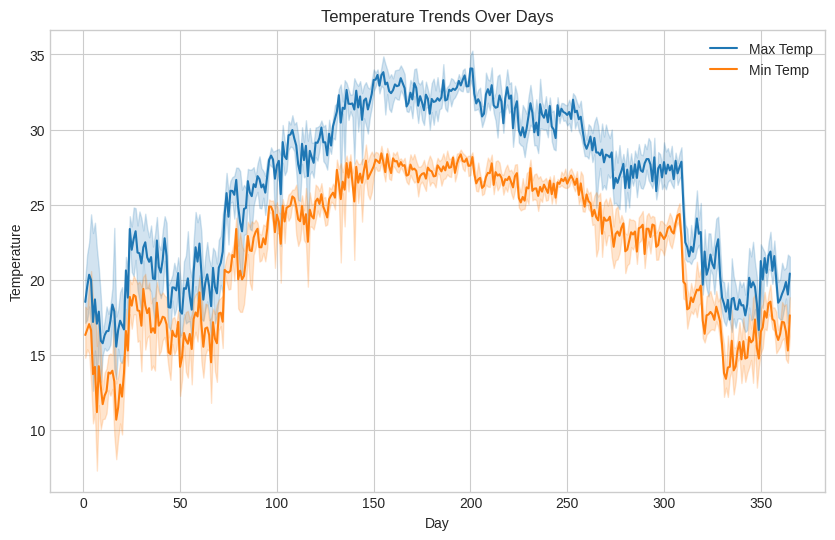

In [17]:
# We can also explore potential seasonal patterns by plotting features against "day"
plt.figure(figsize=(10, 6))
sns.lineplot(x='day', y='maxtemp', data=train, label='Max Temp')
sns.lineplot(x='day', y='mintemp', data=train, label='Min Temp')
plt.title('Temperature Trends Over Days')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.legend()
plt.show()

### Explanation and Findings

- **Day Distribution**: The `day` feature is uniformly distributed from 1 to 365, suggesting a full year's data.
- **Seasonal Pattern**:
  - Both **Max Temp** and **Min Temp** rise in the middle of the year (around day ~200) and drop toward the ends, indicating a **seasonal cycle** (likely warmer in the middle of the year, cooler at the beginning and end).
  - This cyclical trend might be valuable for modeling if we encode seasonality (e.g., sine/cosine transforms of day).

---


# Conclusion and Next Steps

From this EDA, we can derive several important insights:

1. **Class Imbalance**: Approximately 75% of days are rainy. We should consider balancing techniques or appropriate metrics (e.g., ROC AUC, F1-score) to handle this imbalance.
2. **Correlated Features**: 
   - **maxtemp**, **temparature**, and **mintemp** are highly correlated. We might drop or combine some to reduce multicollinearity.
   - **cloud** and **sunshine** show a strong negative correlation.
3. **Key Drivers of Rainfall**: High humidity, cloud cover, dewpoint, and lower sunshine correlate with rainfall.
4. **Missing Value**: Test set has 1 missing value in `winddirection` that needs to be handled (imputation or dropping).
5. **Seasonality**: Temperature features exhibit seasonal trends over `day`.

**Potential Techniques to Proceed**:
- **Feature Engineering**:
  - Create seasonal features (e.g., `sin(day)`, `cos(day)`).
  - Engineer interaction features (e.g., `humidity * cloud`, etc.).
  - Consider dropping redundant features or applying PCA to correlated temperature variables.
- **Modeling**:
  - Try classification models (Logistic Regression, Random Forest, XGBoost, etc.).
  - Use **class imbalance** strategies (class weights, SMOTE, etc.).
- **Hyperparameter Tuning**: Optimize model parameters (GridSearchCV, RandomizedSearchCV, Bayesian optimization).
- **Validation Strategy**: Possibly time-based split if data is chronological, or standard cross-validation.

This concludes the EDA. We now have a solid understanding of the dataset’s structure and can move forward to building and evaluaing predictive models.
